# Chapter 1: basic techniques

First we'll need to import the necessary libraries. I will import everything from sympy. This is something I normally would not do, but in this case I reckon it helps with the readability.

In [1]:
import numpy as np
from sympy import *
from IPython.core.display import display

In [2]:
init_printing()

## Exercise 1.2: system of equations

In this exercise we are asked to solve a list of seven systems of equations. To stay true to the exercise I will use the same symbol names, but x, y, and z would also have done the job.

The equations are given in the following form:
$$\begin{cases} 4x + y = 14.5 \\ 3x + 2y = 16.5 \end{cases}$$

We can pretty much copy the equations and use the `solve` function in sympy to get the parameters for which these equations hold.

**Exercise 1.2.a**

In [3]:
a, b, c, x, y, z, p, q = symbols("a b c x y z p q")

equations = [4*x + y - 14.5,
             3*x + 2*y - 16.5]

display(*equations, solve(equations))

**Exercise 1.2.b**

In [4]:
equations = [2*p - 4*q + 4,
             3*p + 4*q - 24]

display(*equations, solve(equations))

**Exercise 1.2.c**

In [5]:
equations = [3*x + 2*y - 5,
             9*x + 6*y - 15]

display(*equations, solve(equations))

There doesn't appear to be a single unique solution for these equations.

**Exercise 1.2.d**

In [6]:
equations = [2*x + 3*y - 8,
             x + y -3]

display(*equations, solve(equations))

**Exercise 1.2.e**

In [7]:
equations = [30*x + 20*y - 50,
             90*x + 60*y - 10]

display(*equations, solve(equations))

There is no possible solution to this system, so interestingly enough Sympy returns an empty list.

**Exercise 1.2.f**

Solving larger systems works the same:

In [8]:
equations = [3*x + y + 2*z - 1,
             2*x - 2*y + 4*z + 2,
             x + 2*z + 1]

display(*equations, solve(equations))

**Exercise 1.2.g**

In [9]:
equations = [2*a + 3*b - 2*c + 8,
             5*a - 2*b + 4*c - 26,
             -a - 2*b + c - 5]

display(*equations, solve(equations))

## Exercise 1.3: goniometric functions

### Exercise 1.3.1 - conversions

Doing conversions from radians to degrees are pretty straightforward, we can use the built-in math library or numpy, or sympy:

**Exercise 1.3.1.a**

In [10]:
deg(2).round(2)

**Exercise 1.3.1.b**

In [11]:
rad(20).round(2)

### Exercise 1.3.2 - triangle

So this exercise doesn't really require you to calculate anything. You just need to know the `SOHCAHTOA` rule:

$$\sin{\phi}=\frac{O}{H}, \cos{\phi}=\frac{A}{H}, \tan{\phi}=\frac{O}{A}$$

In [12]:
4/5, 3/5, 3/4

### Exercise 1.3.3 - triangle 2.0

**Exercise 1.3.3.a**

In [13]:
angle = asin(1/3)

print(f"The cos of ϕ is {cos(angle).evalf():.2f} and the tan of ϕ is {tan(angle).evalf():.2f}")

The cos of ϕ is 0.94 and the tan of ϕ is 0.35


**Exercise 1.3.3.b**

In [14]:
angle = atan(2)

print(f"The sin of ϕ is {sin(angle).evalf():.2f} and the cos of ϕ is {cos(angle).evalf():.2f}")

The sin of ϕ is 0.89 and the cos of ϕ is 0.45


### Exercise 1.3.4 - unit circle

We cannot use our calculator for these exercises, but nobody said anything about Python:

In [15]:
solutions = [sin(pi) - sin(0.5 * pi), cos(-pi) - cos(0),
             sin(rad(45)),
             cos(pi / 4),
             sin(rad(30)),
             sin(rad(210)),
             cos(rad(30)),
             cos(pi / 6)
]

display(*solutions)

### Exercise 1.3.5 - arctan and arccos

In [16]:
atan(1)

In [17]:
ans = deg(acos(0.24)) * -1
ans.evalf()

### Exercise 1.3.6 - sketches

Here we need to calculate polar coordinates and make a sketch of the result. It is probably fastest to make some polar plots with matplotlib:

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600

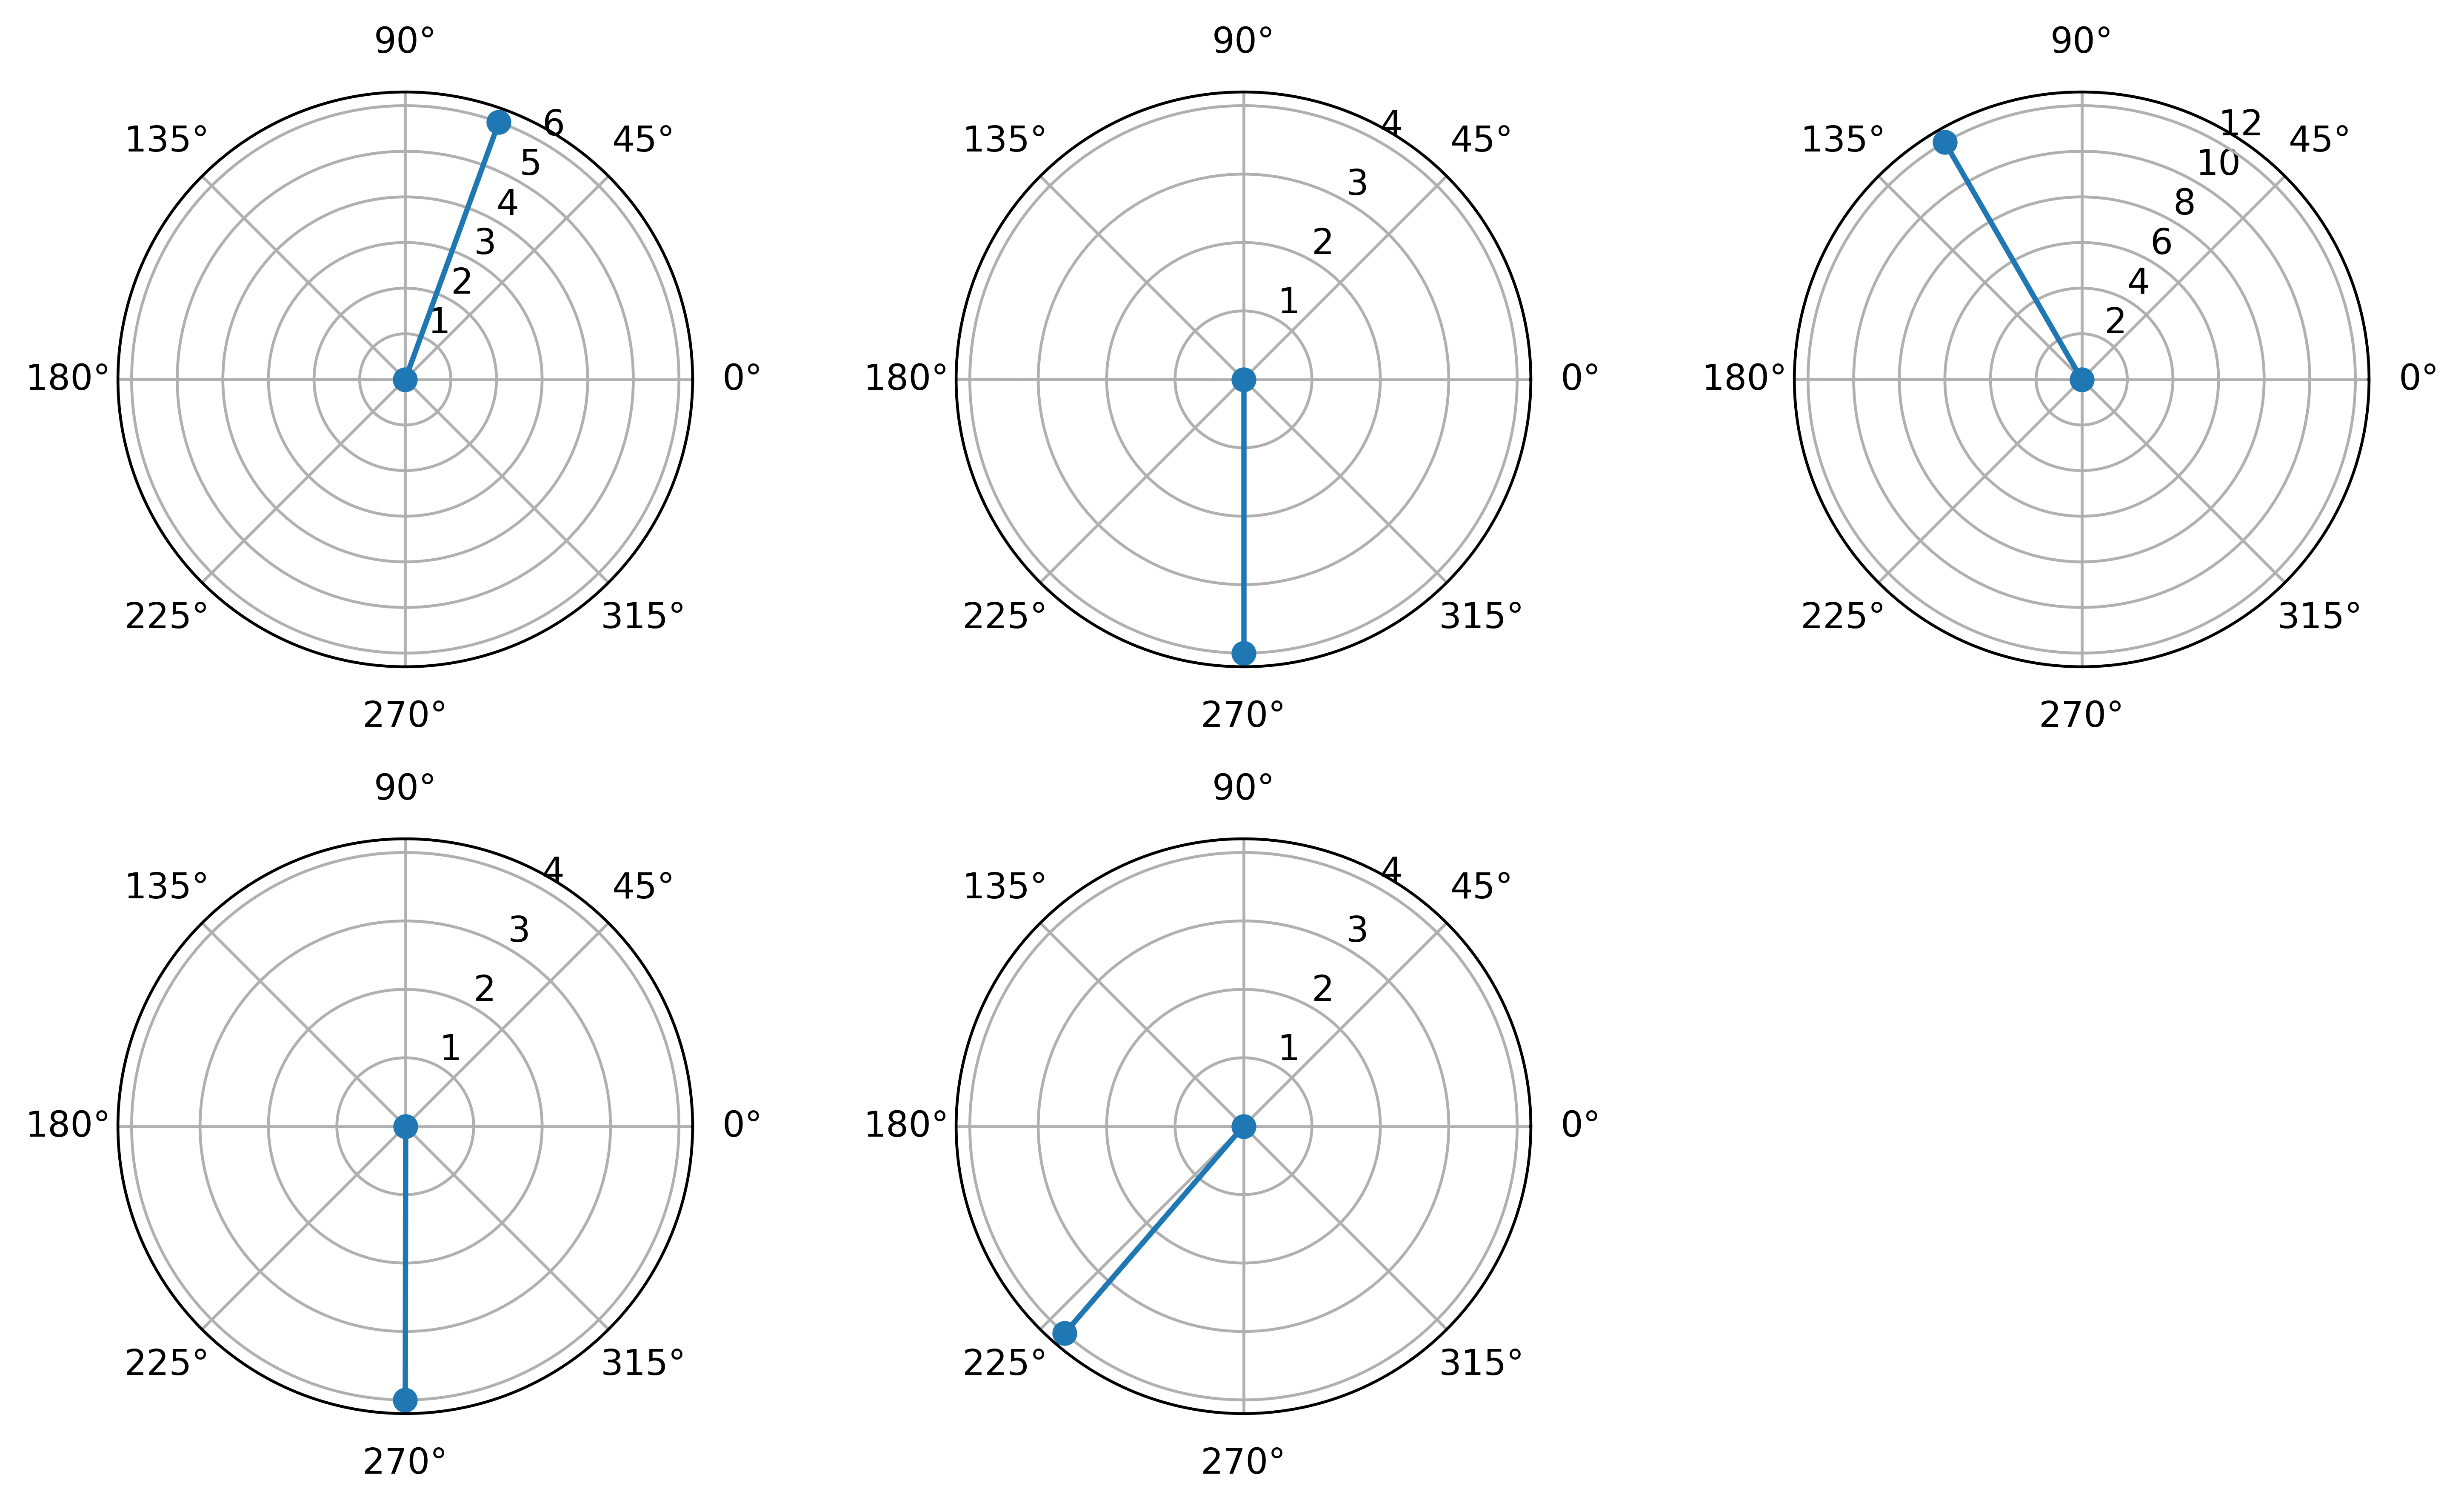

In [19]:
coordinates = [(6, rad(70)),
               (4, -pi/2),
               (12, rad(120)),
               (4, 3*pi/2),
               (4, 4)]

fig, axs = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(10, 6))
axs = axs.flatten()
axs[-1].remove()


for ax, (radius, angle) in zip(axs, coordinates):
    ax.plot([0, angle], [0, radius], "o-")
    ax.set_rlabel_position(60)
    ax.set_rorigin(0)

plt.tight_layout()
plt.show()

### Exercise 1.3.7 - cranks

This exercise concerns a 2D analysis of a bicycle crank angle. First we'll define a function to convert Cartesian coordinates to polar coordinates. I'll also use numpy to allow for broadcasting:

In [20]:
def cartesian_to_polar(x_coord: np.ndarray, y_coord: np.ndarray) -> tuple[float, float]:
    """Converts an x, y coordinate to a polar coordinate"""
    r = np.sqrt(x_coord**2 + y_coord**2)
    theta = np.arctan2(y_coord, x_coord)
    return r, theta

Now we'll need to calculate the radius and the angles and make a situational sketch:

In [21]:
origin = np.array([[0.13, 0.27],
                   [0.13, 0.27]])  # each row is a sample, columns are x and y
coordinates = np.array([[0.30, 0.30],
                        [0.03, 0.13]])

coordinates -= origin

polar_coordinates = cartesian_to_polar(*coordinates.T)

for radius, angle in polar_coordinates:
    print(f"The radius of the crank is {radius:.2f}m and the angle wrt the x-axis is {float(deg(angle) % 360):.2f}°")

The radius of the crank is 0.17m and the angle wrt the x-axis is 9.86°
The radius of the crank is 0.17m and the angle wrt the x-axis is 234.46°


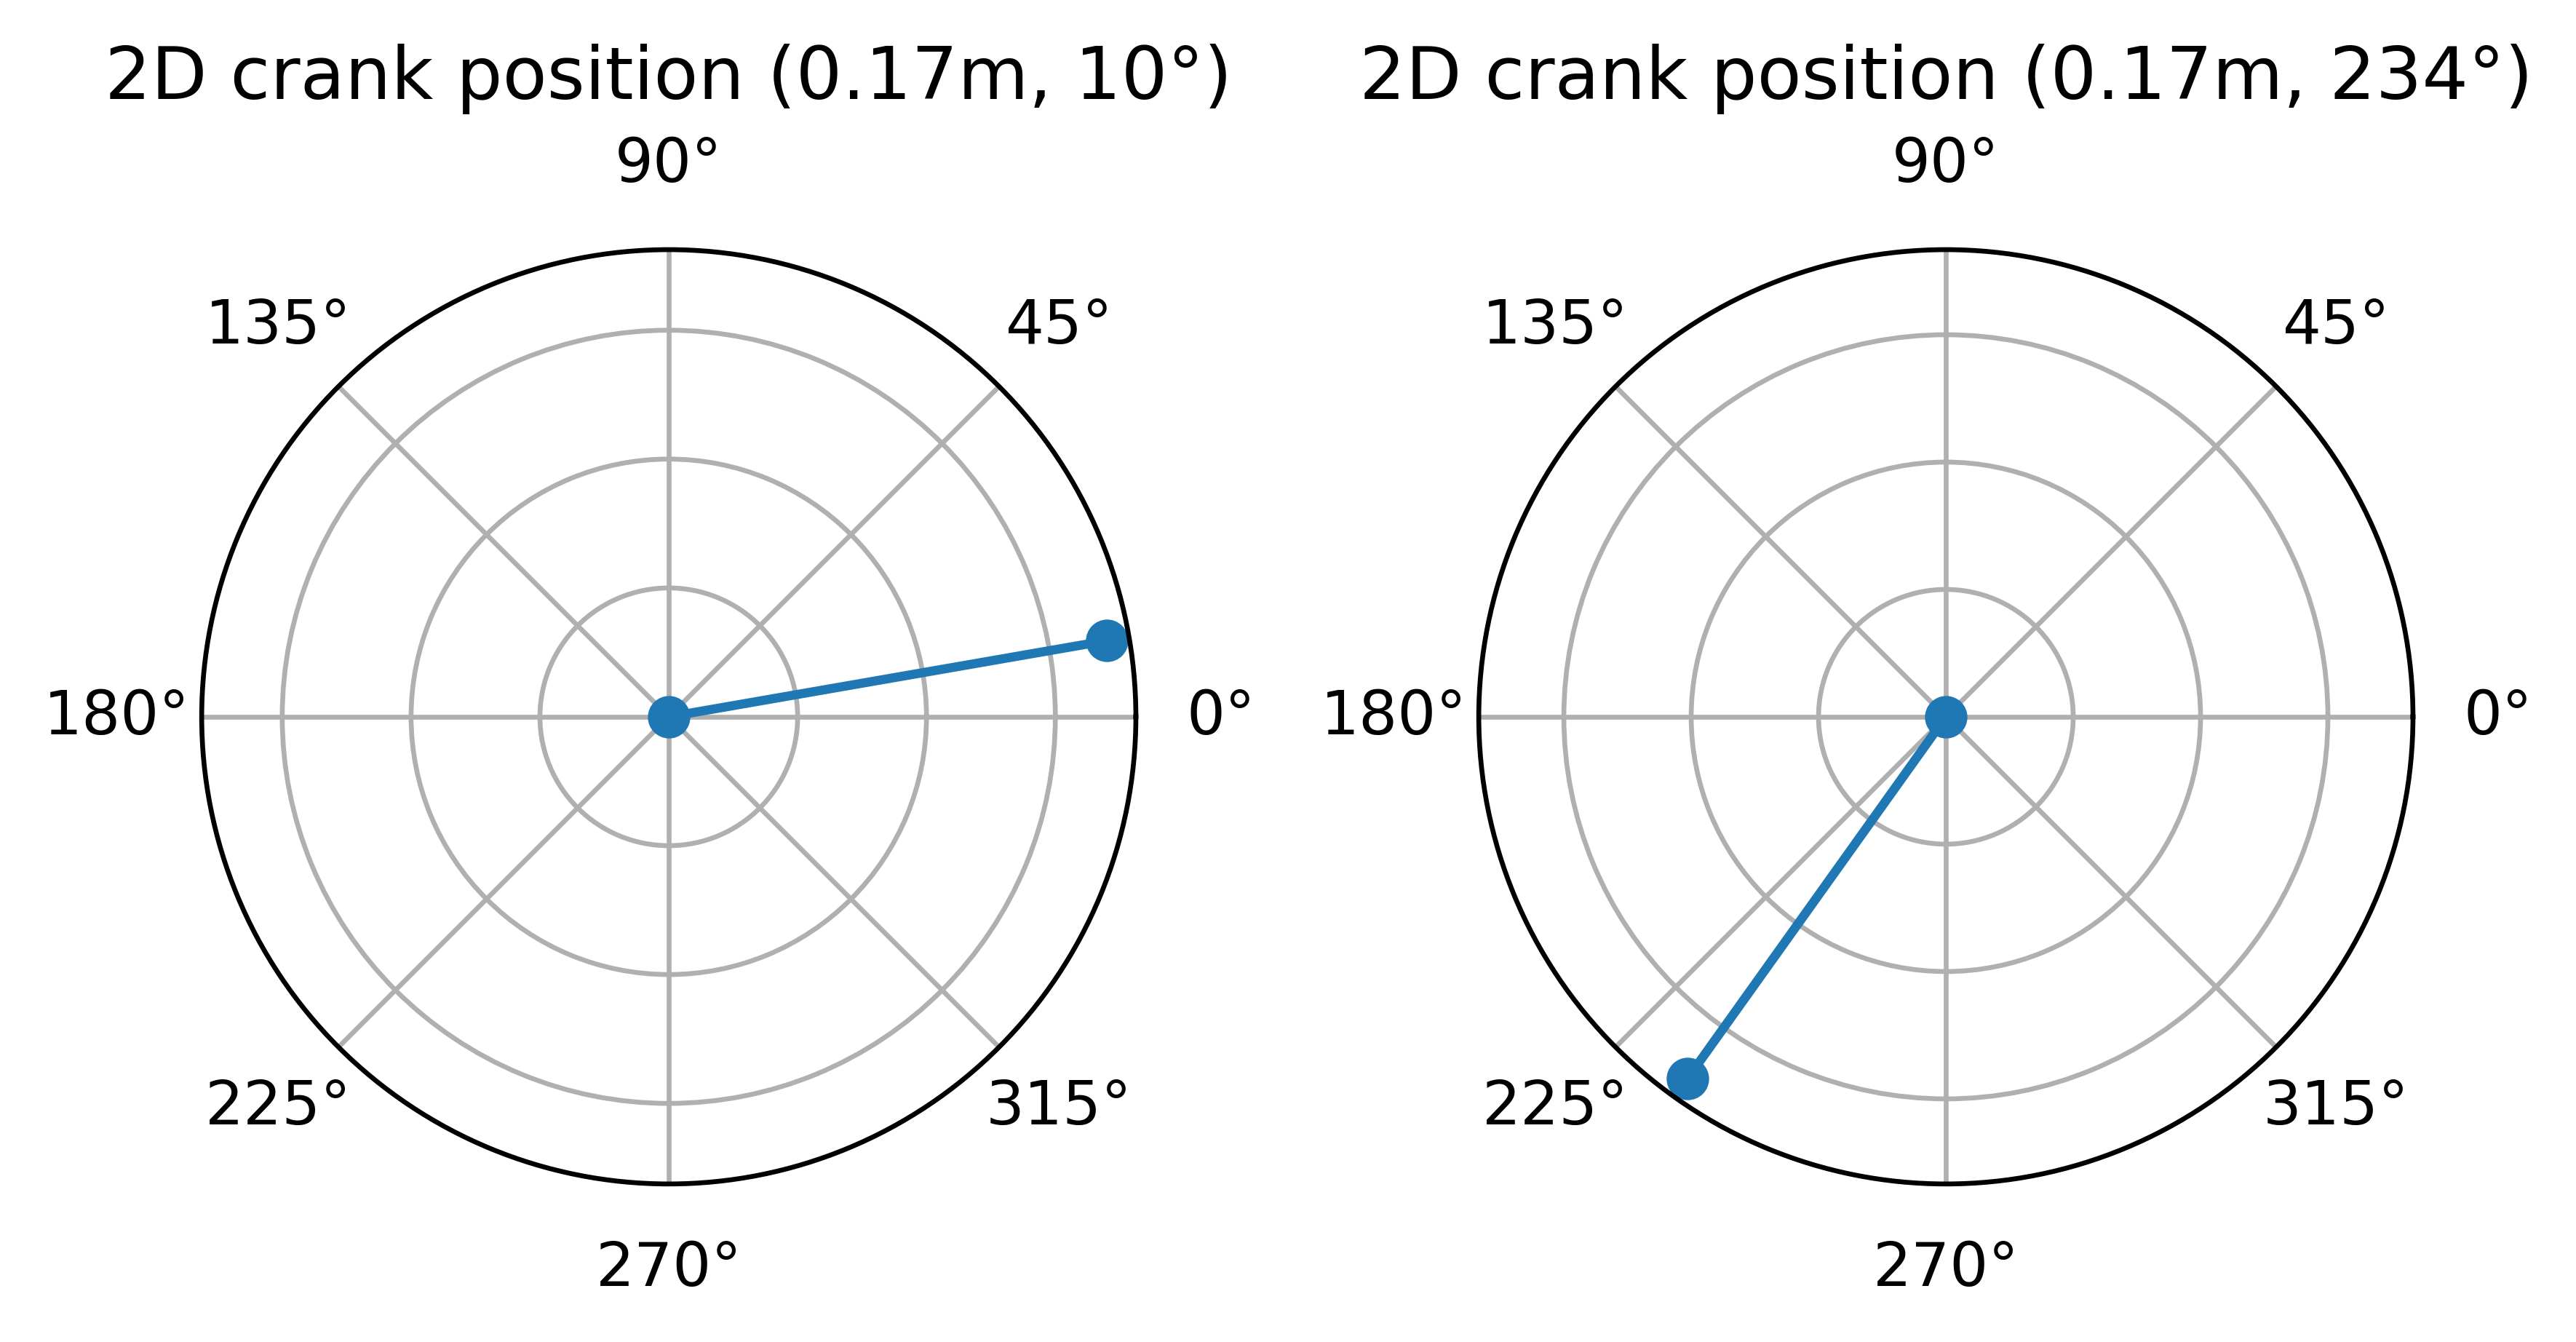

In [22]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})

for ax, (radius, angle) in zip(axs, polar_coordinates):
    ax.plot([0, angle], [0, radius], "o-")
    ax.set_yticklabels([])
    ax.set_rorigin(0)
    ax.set_title(f"2D crank position ({radius:.2f}m, {float(deg(angle) % 360):.0f}°)")

plt.tight_layout()
plt.show()

### Exercise 1.3.8 - joint angles

Here we're asked to determine a knee angle based on an image with segment distances. The examples use the rule of cosines, which we'll also use here, but a vector dot product would also work!

In [23]:
def cosines_angle(side_a: float, side_b: float, side_c: float) -> float:
    """Calculates the angle γ with the rule of cosines in radians"""
    return acos((side_a**2 + side_b**2 - side_c**2) / (2 * side_a * side_b)).evalf()


angle = cosines_angle(0.5, 0.4, 0.65)
print(f"The knee angle is {angle:.2f} rad or {deg(angle).evalf():.2f}°")

The knee angle is 1.60 rad or 91.79°


### Exercise 1.3.9 - joint angles 2.0

Same question, but now based on 3D segment locations:

In [24]:
hip = np.array([14, 12, 0])  # xyz location
knee = np.array([6, 15, 10])
foot = np.array([-2, 11, 4])

upper_leg = np.linalg.norm(hip - knee)
lower_leg = np.linalg.norm(knee - foot)
foot_hip = np.linalg.norm(hip - foot)

angle = cosines_angle(upper_leg, lower_leg, foot_hip)
print(f"The knee angle is {angle:.2f} rad or {deg(angle).evalf():.2f}°")

The knee angle is 1.51 rad or 86.76°


## Exercise 1.4: complex numbers

### Exercise 1.4.1 - solve for a and b

In this exercise we need to find `a` and `b` in an equation that involves complex numbers. I couldn't get these to work at first, but you can get to the right solution if you give sympy a little more to work with. Instead of just using `a` and `b` we'll set up real variables and make complex variables out of those. There is probably a more elegant way, but this does work...

**Exercise 1.4.1.a**

In [25]:
a1, a2, b1, b2 = symbols("a1 a2 b1 b2", real=True)

a12 = a1 + a2*I
b12 = b1 + b2*I

equation = a12**3 + 2*b12*I - 27 - 8*I

solution = solve([equation, im(b12), im(a12)])
display(equation, a12.subs(solution[0]), b12.subs(solution[0]))

**Exercise 1.4.1.b**

In [26]:
equation = Rational(1, 2) * E**-I - 5*a12 - 3*I*b12

solution = solve([equation, im(b12), im(a12)])
display(equation, a12.subs(solution).evalf(3), b12.subs(solution).evalf(3))

**Exercise 1.4.1.c**

In [27]:
equation = E**(2*I) - 3*a12 + 6*I*b12

solution = solve([equation, im(b12), im(a12)])
display(equation, a12.subs(solution).evalf(3), b12.subs(solution).evalf(3))

### Exercise 1.4.2 - simplify

In [28]:
z = (2 + 6*I) * (3 -4*I)

display(z, z.simplify())

In [29]:
z = Rational(1, 2) * (2 + 6*I) * (3 - 4*I)**3

display(z, z.simplify())

### Exercise 1.4.3 - real and imaginary part

In [30]:
expression = (2 + 4*I) / (1 + I)

display(re(expression), im(expression))

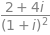

In [31]:
expression = (2 + 4*I) / (1 + I)**2

display(expression, re(expression), im(expression))

### Exercise 1.4.4 - solve

In [32]:
solve(x**2 + 2*x + 2)

### Exercise 1.4.5 - magnitude and argument

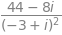

In [33]:
z = (44 - 8*I) / (I - 3)**2

display(z, abs(z), deg(arg(z)).evalf())

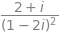

In [34]:
z = (2 + I) / (1 - 2*I)**2

display(z, abs(z), deg(arg(z)).evalf())

Done! By finishing chapter 1 we've proven that all the prerequisite math that is needed for Human Movement Sciences can be solved with Sympy 🚀